In [2]:
# prompt: saya ingin memanggil data Sasuke.csv yang telah saya unggah

import pandas as pd

# Ganti 'Prabowo.csv' dengan nama file yang sesuai jika berbeda
Sasuke = pd.read_csv('Sasuke.csv')

# Menampilkan beberapa baris pertama data untuk verifikasi
print(Sasuke.head())


   conversation_id_str  created_at  favorite_count  \
0                    1  2025-03-18              91   
1                    2  2025-03-12             292   
2                    3  2025-03-15             114   
3                    4  2025-03-10              36   
4                    5  2025-03-15             256   

                                 full_text  id_str  image_url  \
0  Sasuke's Sharingan scenes are the best.       1        NaN   
1  I still can't believe Sasuke's journey.       2        NaN   
2   No one beats Sasuke when he's serious.       3        NaN   
3      Sasuke's theme song hits different.       4        NaN   
4  I still can't believe Sasuke's journey.       5        NaN   

   in_reply_to_screen_name lang  location  quote_count  reply_count  \
0                      NaN   en       NaN            0            6   
1                      NaN   en       NaN            0            1   
2                      NaN   en       NaN            0           16   


In [3]:
Sasuke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      200 non-null    int64  
 1   created_at               200 non-null    object 
 2   favorite_count           200 non-null    int64  
 3   full_text                200 non-null    object 
 4   id_str                   200 non-null    int64  
 5   image_url                0 non-null      float64
 6   in_reply_to_screen_name  0 non-null      float64
 7   lang                     200 non-null    object 
 8   location                 0 non-null      float64
 9   quote_count              200 non-null    int64  
 10  reply_count              200 non-null    int64  
 11  retweet_count            200 non-null    int64  
 12  tweet_url                0 non-null      float64
 13  user_id_str              200 non-null    int64  
 14  username                 2

**Tahapan Cleaning Data**

In [4]:
Sasuke["full_text"]

,full_text
0,Sasuke's Sharingan scenes are the best.
1,I still can't believe Sasuke's journey.
2,No one beats Sasuke when he's serious.
3,Sasuke's theme song hits different.
4,I still can't believe Sasuke's journey.
...,...
195,No one beats Sasuke when he's serious.
196,Sasuke's character development is insane.
197,I still can't believe Sasuke's journey.
198,Uchiha clan was done dirty 😤


In [5]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [6]:
#membuat sebuah variabel baru untuk menyimpan data hasil cleaning

Sasuke["text_clean"] = ''

In [7]:
#Pembersihan text dari symbol
for i, row in Sasuke.iterrows():
    Sasuke.at[i, "text_clean"] = clean(row.full_text)

In [8]:
Sasuke.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1,2025-03-18,91,Sasuke's Sharingan scenes are the best.,1,NaN,NaN,en,NaN,0,6,36,NaN,1,@animevibes,Sasuke's Sharingan scenes are the best.
1,2,2025-03-12,292,I still can't believe Sasuke's journey.,2,NaN,NaN,en,NaN,0,1,19,NaN,2,@team7fan,I still can't believe Sasuke's journey.
2,3,2025-03-15,114,No one beats Sasuke when he's serious.,3,NaN,NaN,en,NaN,0,16,33,NaN,3,@leafshinobi,No one beats Sasuke when he's serious.
3,4,2025-03-10,36,Sasuke's theme song hits different.,4,NaN,NaN,en,NaN,0,15,27,NaN,4,@otakucorner,Sasuke's theme song hits different.
4,5,2025-03-15,256,I still can't believe Sasuke's journey.,5,NaN,NaN,en,NaN,0,1,10,NaN,5,@naruto_fan,I still can't believe Sasuke's journey.


In [9]:
Sasuke[["full_text", "text_clean"]].head()

,full_text,text_clean
0,Sasuke's Sharingan scenes are the best.,Sasuke's Sharingan scenes are the best.
1,I still can't believe Sasuke's journey.,I still can't believe Sasuke's journey.
2,No one beats Sasuke when he's serious.,No one beats Sasuke when he's serious.
3,Sasuke's theme song hits different.,Sasuke's theme song hits different.
4,I still can't believe Sasuke's journey.,I still can't believe Sasuke's journey.


NLTK Process

In [10]:
pip install nltk

In [11]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [12]:
#Contoh tokenisasi
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


In [13]:
# prompt: saya ingin melakukan tokenisasi seperi syntax 23 untuk Sasuke["text_clean"]

# Tokenisasi kata pada kolom 'text_clean'
Sasuke['tokenized_text'] = Sasuke['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(Sasuke[['text_clean', 'tokenized_text']].head())


                                text_clean  \
0  Sasuke's Sharingan scenes are the best.   
1  I still can't believe Sasuke's journey.   
2   No one beats Sasuke when he's serious.   
3      Sasuke's theme song hits different.   
4  I still can't believe Sasuke's journey.   

                                      tokenized_text  
0  [Sasuke, 's, Sharingan, scenes, are, the, best...  
1  [I, still, ca, n't, believe, Sasuke, 's, journ...  
2  [No, one, beats, Sasuke, when, he, 's, serious...  
3      [Sasuke, 's, theme, song, hits, different, .]  
4  [I, still, ca, n't, believe, Sasuke, 's, journ...  


In [14]:
Sasuke["tokenized_text"].head()

,tokenized_text
0,"[Sasuke, 's, Sharingan, scenes, are, the, best..."
1,"[I, still, ca, n't, believe, Sasuke, 's, journ..."
2,"[No, one, beats, Sasuke, when, he, 's, serious..."
3,"[Sasuke, 's, theme, song, hits, different, .]"
4,"[I, still, ca, n't, believe, Sasuke, 's, journ..."


In [15]:
# prompt: saya ingin mengambil stopwords dalam bahasa indonesia

import nltk
nltk.download('stopwords')

# Mendapatkan daftar stopwords dalam bahasa Indonesia
from nltk.corpus import stopwords
stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [16]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

In [17]:
# prompt: saya ingin melakukan stopwords di Sasuke["tokenized_text"]

# Mendapatkan daftar stopwords dalam bahasa Indonesia
stop_words_indonesia = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari list token
def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

# Menerapkan fungsi remove_stopwords ke kolom 'tokenized_text'
Sasuke['tokenized_stopwords'] = Sasuke['tokenized_text'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text_no_stopwords
Sasuke[['tokenized_text', 'tokenized_stopwords']].head()


,tokenized_text,tokenized_stopwords
0,"[Sasuke, 's, Sharingan, scenes, are, the, best...","[Sasuke, 's, Sharingan, scenes, are, the, best..."
1,"[I, still, ca, n't, believe, Sasuke, 's, journ...","[I, still, ca, n't, believe, Sasuke, 's, journ..."
2,"[No, one, beats, Sasuke, when, he, 's, serious...","[No, one, beats, Sasuke, when, he, 's, serious..."
3,"[Sasuke, 's, theme, song, hits, different, .]","[Sasuke, 's, theme, song, hits, different, .]"
4,"[I, still, ca, n't, believe, Sasuke, 's, journ...","[I, still, ca, n't, believe, Sasuke, 's, journ..."


Stemming

In [18]:
#Contoh Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


In [19]:
# prompt: saya ingin melakukan stemming pada Sasuke["tokenized_stopwords"] dalam bahasa indonesia

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada list token
def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

# Terapkan fungsi stemming_sastrawi ke kolom 'tokenized_stopwords'
Sasuke['stemmed_words'] = Sasuke['tokenized_stopwords'].apply(stemming_sastrawi)

# Menampilkan beberapa baris pertama data dengan kolom stemmed_words
Sasuke[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[Sasuke, 's, Sharingan, scenes, are, the, best...","[sasuke, s, sharingan, scenes, are, the, best, ]"
1,"[I, still, ca, n't, believe, Sasuke, 's, journ...","[i, still, ca, n t, believe, sasuke, s, journe..."
2,"[No, one, beats, Sasuke, when, he, 's, serious...","[no, one, beats, sasuke, when, he, s, serious, ]"
3,"[Sasuke, 's, theme, song, hits, different, .]","[sasuke, s, theme, song, hits, different, ]"
4,"[I, still, ca, n't, believe, Sasuke, 's, journ...","[i, still, ca, n t, believe, sasuke, s, journe..."
...,...,...
195,"[No, one, beats, Sasuke, when, he, 's, serious...","[no, one, beats, sasuke, when, he, s, serious, ]"
196,"[Sasuke, 's, character, development, is, insan...","[sasuke, s, character, development, is, insane, ]"
197,"[I, still, ca, n't, believe, Sasuke, 's, journ...","[i, still, ca, n t, believe, sasuke, s, journe..."
198,"[Uchiha, clan, was, done, dirty, 😤]","[uchiha, clan, was, done, dirty, ]"


In [21]:
# prompt: berikan saya syntax untuk membuat analisis sentimen untuk variabel stemmed_words

!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
Sasuke['sentiment_score'] = Sasuke['stemmed_words'].apply(analyze_sentiment)

In [23]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(Sasuke[['stemmed_words', 'sentiment_score']].head())


                                       stemmed_words  sentiment_score
0   [sasuke, s, sharingan, scenes, are, the, best, ]           0.6369
1  [i, still, ca, n t, believe, sasuke, s, journe...           0.0000
2   [no, one, beats, sasuke, when, he, s, serious, ]          -0.3612
3        [sasuke, s, theme, song, hits, different, ]           0.0000
4  [i, still, ca, n t, believe, sasuke, s, journe...           0.0000


In [24]:
# Membuat label setiap komentar

# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
Sasuke['sentiment_label'] = Sasuke['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(Sasuke[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())


                                       stemmed_words  sentiment_score  \
0   [sasuke, s, sharingan, scenes, are, the, best, ]           0.6369   
1  [i, still, ca, n t, believe, sasuke, s, journe...           0.0000   
2   [no, one, beats, sasuke, when, he, s, serious, ]          -0.3612   
3        [sasuke, s, theme, song, hits, different, ]           0.0000   
4  [i, still, ca, n t, believe, sasuke, s, journe...           0.0000   

  sentiment_label  
0         positif  
1          netral  
2         negatif  
3          netral  
4          netral  


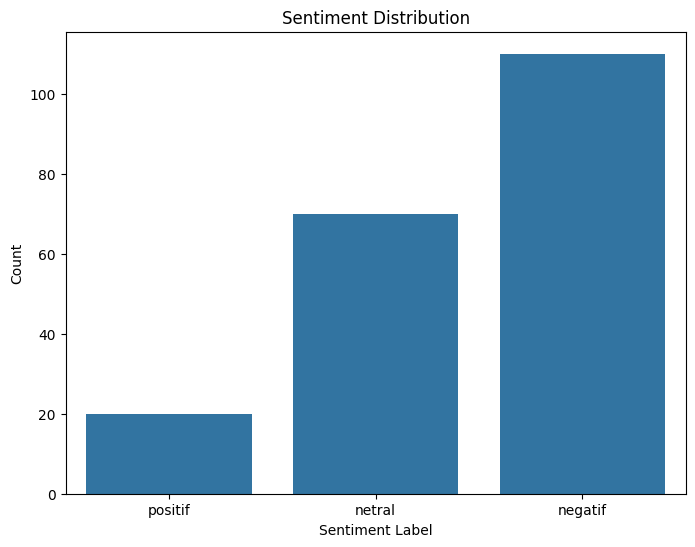

In [25]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=Sasuke)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


In [26]:
# prompt: Buat word cloud dari setiap kategori

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

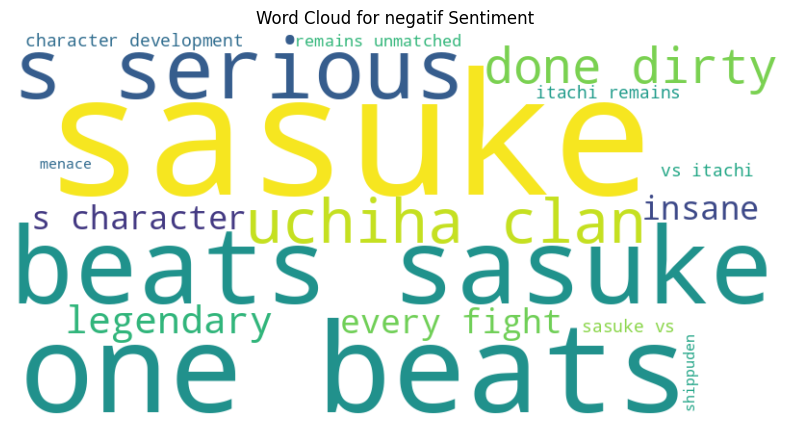

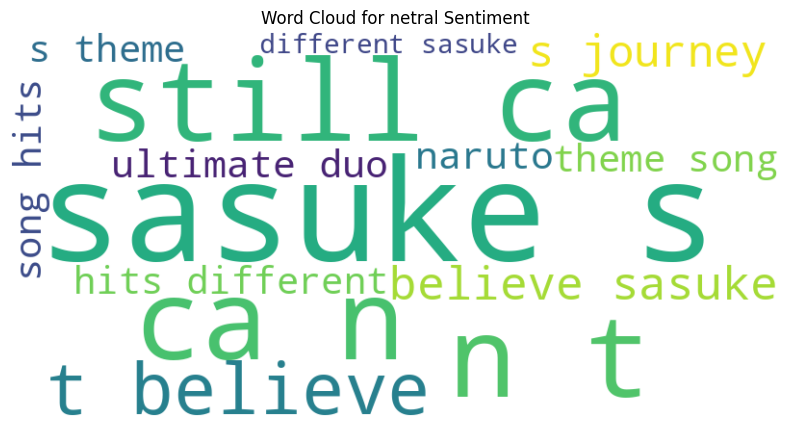

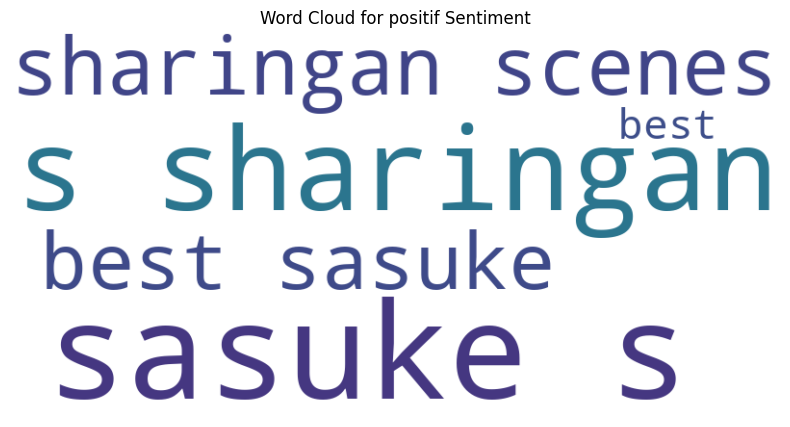

In [27]:

# Group data by sentiment label
sentiment_groups = Sasuke.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


Membuat Model Mechine Learning Untuk Memprediksi Sentimen